# Google Search Trend and Stock Price Tracker

> The following [Jupyter notebook](https://jupyter.org) supports use of the [pyrends API] (https://pypi.org/project/pytrends/) for querying changes in Google search trends and the [Yahoo Finance API] (https://python-yahoofinance.readthedocs.io/en/latest/api.html) for querying changes in a given public stock price. The notebook will generate a simple graph to show how these changes may corrolate over a selected time period. 

## Step 1: Import Libraries
Import pytrends, pandas, datetime, matplotlib and seaborn goodies, and homemade classes Stocks and Google.

In [42]:
from pytrends.request import TrendReq
import pandas as pd
import datetime as dt
from datetime import timedelta

from google_trends import Google
from stocks import Stocks

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
register_matplotlib_converters()

## Step 2: Set Variables
Declare Google search terms, days for analysis (max = 250), and stock ticker.

In [43]:
kw_list = "vaccine"
days = 250
stock_ticker = "JNJ"


## Step 3: Run APIs
Query Google Trends and Closing Stock Prices with selected variables. Tweak results (add index to Google dataframe and change dates to datetime objects in Stocks dataframe).

In [44]:
google_trends = Google (kw_list, days)
stock_trends = Stocks (stock_ticker, days)
gtf = google_trends.trends()
gtf = gtf.reset_index()
stf = stock_trends.stocks()
stf['Dates'] = pd.to_datetime(stf['Dates'])

## Step 4: Merge results into one Trends table
Save as .csv for playing around with

In [45]:
trends = pd.merge(left=gtf, 
                    right=stf, 
                    how='inner',
                    left_on='date', 
                    right_on='Dates')
trends.to_csv("trends.csv", index = False)
trends

,date,vaccine,isPartial,Dates,Closing Price
0,2020-09-08,5,False,2020-09-08,147.26
1,2020-09-09,6,False,2020-09-09,149.70
2,2020-09-10,5,False,2020-09-10,146.91
3,2020-09-11,4,False,2020-09-11,147.78
4,2020-09-14,4,False,2020-09-14,148.35
...,...,...,...,...,...
167,2021-05-07,30,False,2021-05-07,168.50
168,2021-05-10,29,False,2021-05-10,170.27
169,2021-05-11,33,False,2021-05-11,168.88
170,2021-05-12,31,False,2021-05-12,168.20


## Step 5: Create a Pretty Graph
Using Seaborn

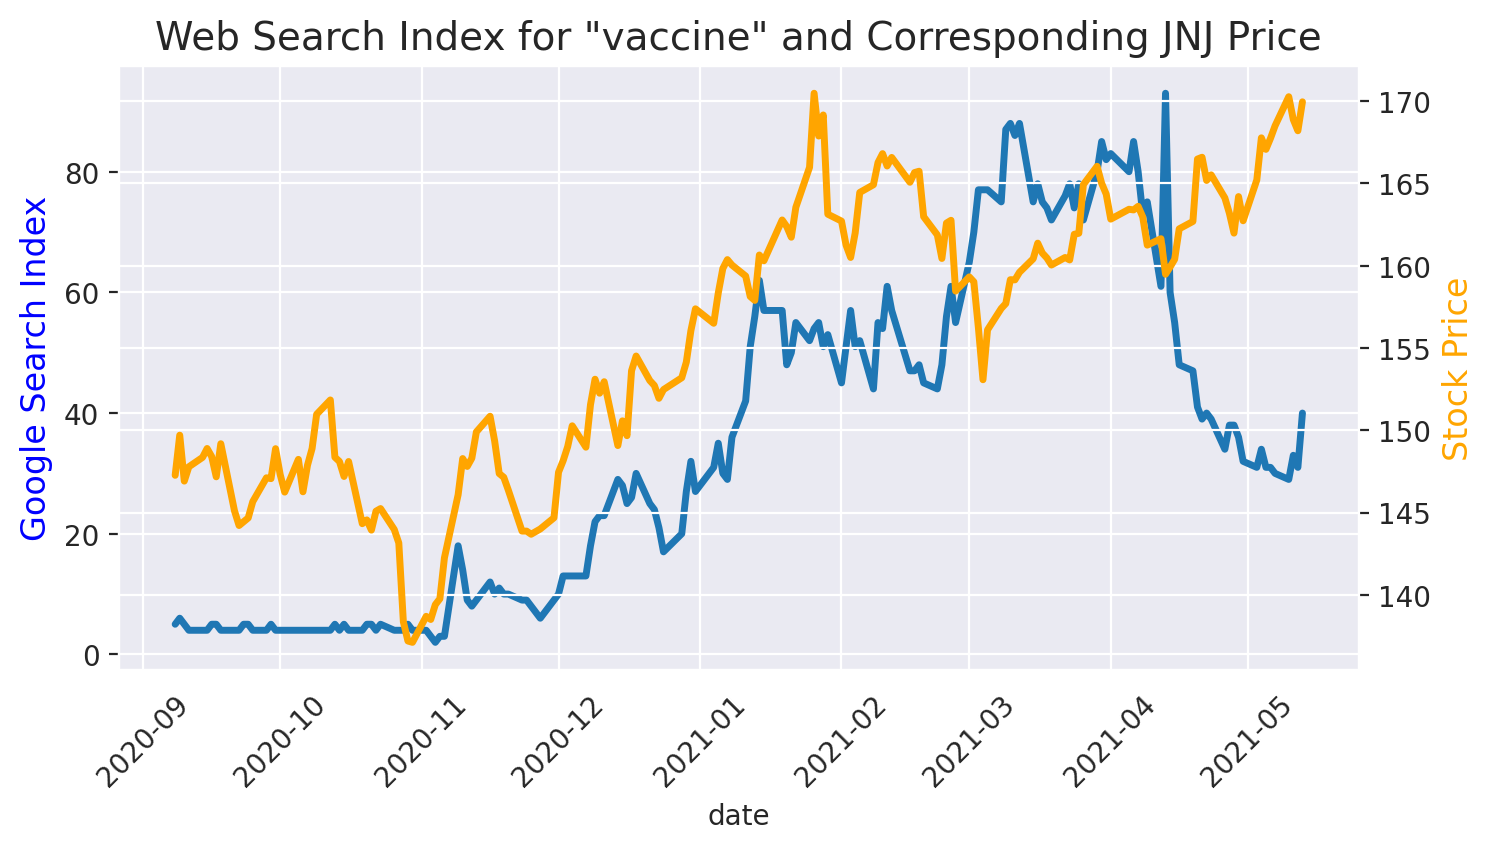

In [46]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4), dpi=200)
    plt.xticks(fontsize=10, rotation = 45)
    plt.title(f'Web Search Index for "{kw_list}" and Corresponding {stock_ticker} Price', fontsize=14)

    ax1 = plt.gca()
    ax2 = plt.twinx()
    
    sns.lineplot(x= trends['date'], y=trends[kw_list], data=trends, palette="tab10", linewidth=2.5, ax=ax1)
    sns.lineplot(x = trends['date'], y = trends['Closing Price'], data=trends, color = "orange", linewidth=2.5, ax=ax2)
    
    ax1.set_ylabel('Google Search Index', fontsize=12, color='blue')
    ax2.set_ylabel('Stock Price', fontsize=12, color='orange')

plt.show()